In [2]:
import os
print(os.getcwd())

C:\Users\Riccardo\Documents\GitHub\DWM-Project\Progetto


In [3]:
import pandas as pd 
data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [4]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


In [5]:
data.drop(['homepage'],axis=1,inplace=True)

### data["genres"]

In [6]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [7]:
def convertAll(data):
    import math
    import datetime

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [8]:
convertAll(data)
convertAll(data_test)

<ipython-input-7-b2a67e616a86>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-7-b2a67e616a86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-7-b2a67e616a86>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-7-b2a67e616a86>:41: SettingWithCop

In [9]:
def get_words (data):
    import math
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [10]:
lyrics_word_split = get_words(data)

print ( lyrics_word_split[3] )

{'herself', 'Bagchi.', 'months', 'city,', '(Vidya', 'begins', 'Bagchi', 'missing', 'is', 'unborn', 'relentless', 'exist.', 'husband', 'truth', 'except', 'soaked', 'tries', 'Arnab', 'about', 'realises', 'does', 'memories', 'seem', 'dead', 'what', 'from', 'of', 'everyone', 'seems.', 'not', 'festive', 'nothing', 'reach', 'clues', 'in', 'city', 'Vidya', 'determined', 'Balan)', 'it', 'With', 'Seven', 'and', 'the', '-', 'her', 'child', 'end', 'that', 'own', 'fragments', 'lies,', 'slowly', 'on', 'husband.', 'search', 'pregnant', 'cost', 'him,', 'unravel', 'life.', 'alone', 'In', 'arrives', 'London', 'a', 'rely', 'even', 'she', 'to', 'for', 'She', 'all', 'when', 'Kolkata', 'find', 'convince', 'at'}


In [11]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [12]:
jaccard(lyrics_word_split[0],lyrics_word_split[123])

0.06896551724137931

In [13]:
def most_similar_jaccard(film_ricerca, lyrics_word_split):
    most_similar_id=1
    jaccard_most_similar=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[2])
    list_size=len(lyrics_word_split)
    current_id=2
    while current_id<list_size:
        current_sim=jaccard(lyrics_word_split[film_ricerca],lyrics_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

sim_id, sim_value = most_similar_jaccard(0, lyrics_word_split)

In [14]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

data_with_budget.shape: (2188, 22)


Text(0.5, 1.0, 'Revenue based on budget per movie')

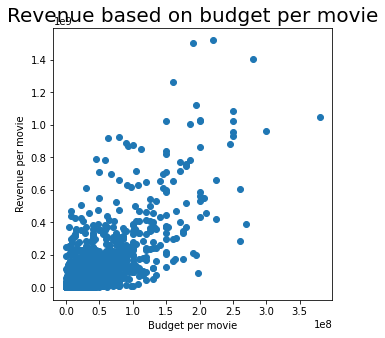

In [15]:
import matplotlib.pyplot as plt
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]
print("data_with_budget.shape:", data_with_budget.shape)

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

In [16]:
# The number of the beast
sum(data_with_budget['revenue'] <= 10000000)

666

In [17]:
import numpy as np

#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans

#matrix budget-revenue
#matrice = [len(data_with_budget)][2]
#br = [data_with_budget['budget'], data_with_budget['revenue']]

#k_means = KMeans(n_clusters=5, n_init=1)
#k_means.fit(br)


#fig, ax = plt.subplots(figsize=(5,5))

#ax.scatter(br.iloc[0, :], br.iloc[1, :], c=k_means.labels_)

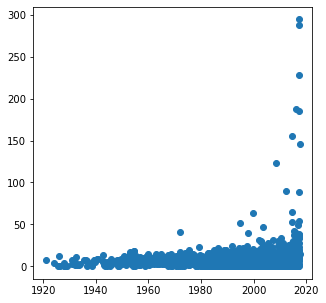

In [18]:
from datetime import datetime
import matplotlib.pyplot as plt

data = data.sort_values(by="release_date")
data["release_date"] = pd.to_datetime(data["release_date"])

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data['release_date'], data['popularity'])


In [19]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_year"]=data["release_date"].dt.year


In [20]:
# Si vuole sviluppare un algoritmo che, in base al genere del film che uscirà, preveda, grazie ai "vicini", quanto potrebbe
# guadagnare al botteghino
# utilizzo dell'algoritmo knn

#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Action', 'Adventure', 'Family', 'Fantasy', 'Romance', 'History', 'Mystery', 'Horror', 'Thriller', 'Crime', 'War', 'Music', 'Western', 'Science Fiction', 'Animation', 'Documentary', 'Foreign', 'TV Movie']


(1960.0, 2021.8)

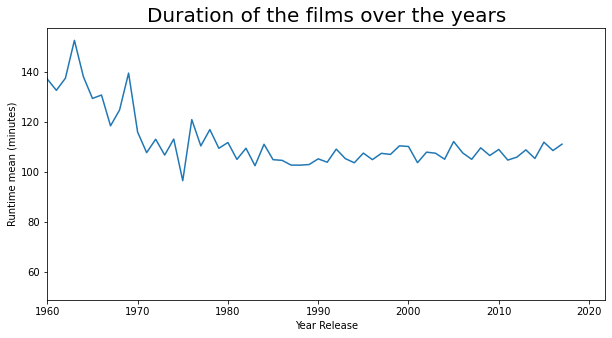

In [21]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

#We made the x axis starting from 1960 in previous year there were way few film in order to have a decent graph
x.set_xlim(1960)

In [22]:
#Proviamo a usare l'algoritmo knn applicato su popularity, budget, runtime per predirre la revenue. 
#Visto che i valori hanno un range molto diverso bisogna prima normalizzarli portandoli in un range 0-1
#Usiamo la formula (x-min(x))/(max(x)-min(x))

In [23]:
#creo un funzione che aggiunge una colonna al database con il campo normalizzato

def normalizza(data, campo):
    #data[campo+"Norm"]=(data[campo]-data[campo].min())/(max(data[campo])-min(data[campo]))
    data[campo+"Norm"]=data[campo]
    
normalizza(data,"popularity")
normalizza(data,"budget")
normalizza(data,"runtime")

#DA FIXARE: fillare valori nan con media al posto dello 0
data.runtimeNorm=data.runtimeNorm.fillna(0)

data.isna().sum()
          

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
dtype: int64

In [24]:
data["runtimeNorm"].fillna(0)
data[ ["revenue","popularityNorm", "runtimeNorm", "budgetNorm"]].info()
dataset = data[ ["revenue","popularityNorm", "runtimeNorm", "budgetNorm"]].astype(float).values


X = dataset[:,1:]
print("X shape", X.shape)

# get class label
y = dataset[:,0]
print("y shape", y.shape)
print (y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1763 to 2623
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   revenue         3000 non-null   int64  
 1   popularityNorm  3000 non-null   float64
 2   runtimeNorm     3000 non-null   float64
 3   budgetNorm      3000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 197.2 KB
X shape (3000, 3)
y shape (3000,)
[2.50000000e+06 1.21388000e+06 1.00000000e+00 ... 4.22000000e+02
 3.69907963e+08 9.00242920e+07]


In [25]:
from sklearn import neighbors

kNN = neighbors.KNeighborsClassifier(n_neighbors=7)
kNN.fit(X,y)

y_pred = kNN.predict(X)


print ("predicted", y_pred)
print()
print ("true", y)
print()


from sklearn.metrics import accuracy_score

# compute Accuracy
print ("Accuracy")
print ( accuracy_score(y_true=y, y_pred=y_pred) )

predicted [2.38590000e+04 4.82980000e+04 1.00000000e+00 ... 4.22000000e+02
 2.05366737e+08 9.00242920e+07]

true [2.50000000e+06 1.21388000e+06 1.00000000e+00 ... 4.22000000e+02
 3.69907963e+08 9.00242920e+07]

Accuracy
0.145


In [26]:
# i = 0
# count = 0
# while i < len(y):
#     if (y[i] - y_pred[i]) != 0:
#         print("y = ", y[i], " | y_pred = ", y_pred[i])
#         count+=1
#     i+=1
#     
# print("\n\n\n", count)

In [27]:
## Proviamo a prevedere la revenue con linear regression

# lingua inglese, mese dell'anno, budget, revenue, runtime, popolarità

In [28]:
data["lingua_inglese"] = 0

i=0
n_elem = data.shape[0]
while i<n_elem:
    if data["original_language"][i]=="en":
        data["lingua_inglese"][i]=1
    else:
        data["lingua_inglese"][i]=0
    i+=1

data["lingua_inglese"]

data_test["lingua_inglese"] = 0
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if data_test["original_language"][i]=="en":
        data_test["lingua_inglese"][i]=1
    else:
        data_test["lingua_inglese"][i]=0
    i+=1

<ipython-input-28-0ddffbac9336>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lingua_inglese"][i]=1
<ipython-input-28-0ddffbac9336>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lingua_inglese"][i]=0
<ipython-input-28-0ddffbac9336>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["lingua_inglese"][i]=0
<ipython-input-28-0ddffbac9336>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [29]:
data["release_month"]=data["release_date"].dt.month
data_test["release_month"]=data_test["release_date"].dt.month


data["release_month"]

1763     1
2992     3
1917     8
1361    12
2680     5
        ..
2838     6
1695     6
1354     6
1715     7
2623     7
Name: release_month, Length: 3000, dtype: int64

In [30]:
# sostituzione dei valori NaN nella colonna runtime con il valore 0

import math

i=0
n_elem = data.shape[0]
while i<n_elem:
    if math.isnan(data["runtime"][i]):
        data["runtime"][i]=0
        print(data["id"][i])
    i+=1

print(data["title"][1336])
print(data["title"][2303])

data.isna().sum()


1336
2303
Rooster Cogburn
Papillon


<ipython-input-30-39de9cad02eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["runtime"][i]=0


id                          0
belongs_to_collection    2396
budget                      0
genres                      7
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
release_year                0
popularityNorm              0
budgetNorm                  0
runtimeNorm                 0
lingua_inglese              0
release_month               0
dtype: int64

In [31]:
data_test.title=data_test.title.fillna("")

print(data_test["release_date"])

0      2007-07-14
1      1958-05-19
2      1997-05-23
3      2010-09-04
4      2005-02-11
          ...    
4393   2001-08-03
4394   2004-08-20
4395   1982-12-08
4396   2015-02-04
4397   1962-09-20
Name: release_date, Length: 4398, dtype: datetime64[ns]


In [32]:
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if pd.isnull(data_test["release_date"][i]):
        print(data_test["id"][i])
        print(i)
        print(data_test["title"][i])
        print(data_test["release_date"][i])
    i+=1

#solamente a un film mancava la data, dopo averlo cercato abbiamo riempito il campo release_date con il dato corretto
new_date = datetime(2001, 3, 20, 0, 0, 0)
data_test["release_date"][828]=new_date   

3829
828
Jails, Hospitals & Hip-Hop
NaT


<ipython-input-32-91f533a110f4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["release_date"][828]=new_date


In [33]:
# sostituzione dei valori NaN nella colonna runtime con il valore 0

i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if math.isnan(data_test["runtime"][i]):
        data_test["runtime"][i]=0
        print(data_test["id"][i])
    i+=1

3244
4490
4633
6818


<ipython-input-33-3f0ead5e4af1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["runtime"][i]=0


In [34]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

datasetTrainLinear = data[["revenue", "budget", "runtime", "popularity", "release_month", "lingua_inglese"]].astype(float).values
features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

dsTrain = data[0:data.shape[0]-int(data.shape[0]/3)]
dsTest= data[data.shape[0]-int(data.shape[0]/3):data.shape[0]]

In [35]:
X, y = dsTrain[features], dsTrain['revenue']
model = LinearRegression()
model.fit(X, y)
predict = model.predict(dsTest[features])

In [36]:
from sklearn.metrics import mean_squared_error

print ("Train Error: {:.3f}".format( mean_squared_error(y_true = y, 
                                          y_pred = predict[:1000])) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = dsTest['revenue'],  
                                          y_pred = predict)) )

ValueError: Found input variables with inconsistent numbers of samples: [2000, 1000]

In [37]:
print('-'*30)
print(dsTrain[features].isnull().sum())
print('-'*30)
print(dsTest[features].isnull().sum())

------------------------------
budget            0
runtime           0
popularity        0
release_month     0
lingua_inglese    0
revenue           0
dtype: int64
------------------------------
budget            0
runtime           0
popularity        0
release_month     0
lingua_inglese    0
revenue           0
dtype: int64


In [38]:
df = pd.DataFrame({'Actual': dsTest['revenue'], 'Predicted': predict})
df

,Actual,Predicted
1264,31720158,3.172016e+07
2420,4100000,4.100000e+06
1598,373062864,3.730629e+08
658,754249,7.542490e+05
1497,38610009,3.861001e+07
...,...,...
2838,25442939,2.544294e+07
1695,224511319,2.245113e+08
1354,422,4.220000e+02
1715,369907963,3.699080e+08


In [39]:
dsTest.shape[0]

1000

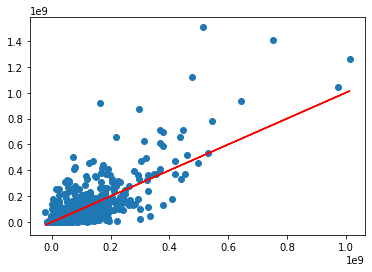

0.6016972868112853

In [40]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


dataPred=data[features]
X=dataPred.iloc[:,0:5]
y=dataPred.iloc[:,5]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

lreg=LinearRegression()

lreg.fit(X_train, y_train)

y_pred=lreg.predict(X_test)

plt.scatter(y_pred, y_test)
plt.plot(y_pred, y_pred, color='red')
plt.show()

score=lreg.score(X_train, y_train)
score

In [41]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
1735,920100000,1.646505e+08
705,36764313,3.362760e+07
2331,35057696,3.302070e+07
984,46216641,1.059129e+08
2398,20275812,4.952283e+07
...,...,...
2340,29359216,9.030678e+07
119,18814720,3.740314e+07
301,2850000,-6.915205e+06
537,335062621,2.044066e+08


Non avendo una curva da seguire, non ha senso provare con polinomi di grado maggiore al primo perchè perchè la roba dei polinomi funziona con le curve.

In [42]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error

for d in [2,4,8,16]:
    # prepare the data
    train_size = int(data.shape[0]*0.66) -1
    poly = PolynomialFeatures(d, include_bias=False)
    poly.fit(X_train)
    X_train_2 = poly.transform(X_train)

    # train the model
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train_2, y_train)

    y_pred = model.predict( poly.transform(X) )

    print ("Polynomial degree:", d)
    print ("Train Error: {:.3f}".format( mean_squared_error(y_true = y_train, 
                                              y_pred = y_pred[:train_size])) )
    print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                              y_pred = y_pred[train_size:])) )
    print ()

Polynomial degree: 2
Train Error: 24824060364762432.000
Test Error : 40183748678122032.000

Polynomial degree: 4
Train Error: 24841892782778360.000
Test Error : 44424627316007592.000

Polynomial degree: 8
Train Error: 20325180242605628.000
Test Error : 54960396439024840.000

Polynomial degree: 16
Train Error: 18455057389237496.000
Test Error : 1167550657499037171712.000



# PCA

In [43]:
from sklearn.preprocessing import StandardScaler

dataPred=data[features]
X=dataPred.iloc[:,0:5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
print(scaled_data)

[[-0.60187427 -1.78805601 -0.02436115 -1.69436819  0.40626167]
 [-0.57795055  1.85235495 -0.37884365 -1.10760788  0.40626167]
 [-0.6086114   1.31303481 -0.67563766  0.3592929   0.40626167]
 ...
 [-0.60862739 -0.39481231  2.39806186 -0.22746741  0.40626167]
 [ 3.49727076  1.44786485 11.37817803  0.06591274  0.40626167]
 [ 4.72557386  1.31303481  0.56184446  0.06591274  0.40626167]]


In [44]:
from sklearn.decomposition import PCA

features = ["budget", "runtime", "popularity", "release_month", "lingua_inglese", "revenue"]

pca = PCA() # this will create as many components 
            # as the number of features
pca.fit(scaled_data)  # note this matrix is [samples x dimentions]
pca.components_

array([[ 0.64302028,  0.40682231,  0.56872755,  0.12609256,  0.28577993],
       [-0.06929007,  0.58973262, -0.16200045,  0.52121877, -0.59118623],
       [ 0.07024973,  0.20879669,  0.21812058, -0.77834976, -0.54595237],
       [-0.13109918, -0.52675564,  0.66008653,  0.31914554, -0.40960152],
       [-0.74806536,  0.40699321,  0.40867349, -0.06891616,  0.32092255]])

In [45]:
# project data onto the selected components
X_proj = pca.transform(scaled_data)

print ( X_proj.shape )
print ( X_proj[:10] )

(3000, 5)
[[-1.22583908 -2.13213735  0.67607619  0.29753789 -0.04029324]
 [ 0.1429269   0.3763309   0.90383792 -1.66993268  1.23812794]
 [-0.08002578  0.87305769 -0.417423   -1.10957803  0.8191796 ]
 [-1.29184915  1.36778264 -0.1194318   2.59604746 -0.88971011]
 [-1.14455178 -0.99342173 -0.22597844 -0.12871765 -0.09361158]
 [-0.64301471 -0.16677138 -0.97786257  0.21819919  0.14625883]
 [-1.04365294 -0.33168975 -1.40956214  0.42098168 -0.27636802]
 [-1.18060871 -1.11542448  0.00593099 -0.26204625 -0.06189705]
 [-2.46144396 -2.77130805 -1.14450346  1.6818777  -1.44773542]
 [-1.26052312 -0.58284197 -1.76978481  0.89870903 -0.54897949]]


In [46]:
# move data back to the original space
X_approx = pca.inverse_transform(X_proj)
X_approx.shape

(3000, 5)

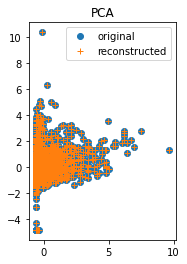

In [47]:
ig, ax = plt.subplots()

ax.plot( scaled_data[:,0], scaled_data[:,1], 'o', label="original" )

ax.plot( X_approx[:,0], X_approx[:,1], '+', label="reconstructed" )

ax.set_title("PCA")
ax.set_aspect('equal')
ax.legend()

In [50]:
len(data['popularity'].unique())

2999

In [52]:
max(data['popularity'])

294.337037

In [69]:
i = 0
count = 0
while i < data.shape[0]:
    if data['popularity'][i] >= 20:
        count += 1
    i+=1
    
print(count)

83
